# Welcome to Colab!

Dimension of phi(x): (100, 15)
Optimal weights w*:
 [ 0.16959964 -0.06652818  0.20541512  0.00558235  0.08999639 -0.12938661
 -0.15380698 -0.00256168  0.02987043 -0.28471824 -0.19250769  0.06571021
 -0.07784438 -0.17968353  0.00527887]
gradient(w)= [-7.28583860e-17 -4.59701721e-17 -2.12503626e-16 -3.29597460e-17
 -3.03576608e-17 -1.77375475e-16 -9.58434720e-17 -9.88792381e-17
 -1.46692554e-16 -7.67615138e-17  5.72458747e-17 -9.97465999e-17
  6.00648004e-17 -2.92734587e-17  2.66713734e-17]
cost(w)= 0.408662805373077


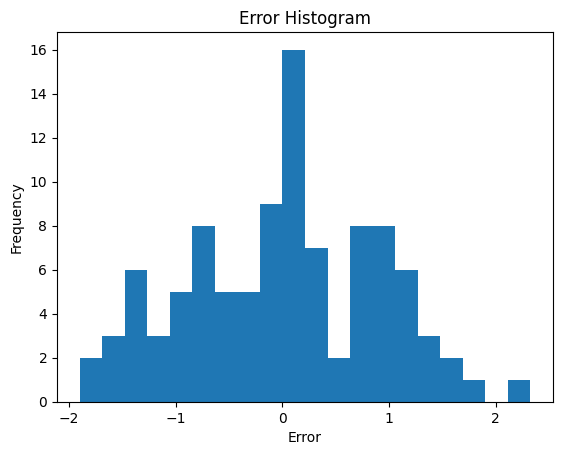

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

X = np.random.randn(100, 4)   # N=100, 4 features
y = np.random.randn(100)

def feature_map(X):
    x1, x2, x3, x4 = X.T
    Phi = np.column_stack([
        np.ones(X.shape[0]),
        x1, x2, x3, x4,
        x1**2, x2**2, x3**2, x4**2,
        x1*x2, x1*x3, x1*x4, x2*x3, x2*x4, x3*x4
    ])
    return Phi

Phi = feature_map(X)

N, d = Phi.shape
print("Dimension of phi(x):", Phi.shape)

# Decision variable
w = np.zeros(d)

# Cost function
def cost(Phi, y, w):
    return (1/(2*N)) * np.linalg.norm(Phi @ w - y)**2

def gradient(Phi, y, w):
    return (1/N) * Phi.T @ (Phi @ w - y)

# Normal equation
w_star = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)

print("Optimal weights w*:\n", w_star)


print("gradient(w)=",gradient(Phi,y,w_star))
print("cost(w)=",cost(Phi,y,w_star))

error = y - Phi @ w_star

plt.figure()
plt.hist(error, bins=20)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Histogram")
plt.show()

#gradient descent
T = 1000
eta = 0.01

w_gd = np.zeros(d)
J_gd = []
err_gd = []

for t in range(T):
    w_gd -= eta * gradient(Phi, y, w_gd)
    J_gd.append(cost(Phi, y, w_gd))
    err_gd.append(np.linalg.norm(w_gd - w_star))
